In [10]:
# https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html
# from scipy.signal import resample

# imports
import sounddevice as sd
import simpleaudio as sa

from scipy.io.wavfile import write
import scipy.io.wavfile
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [12]:
fs = 8000  # Sample rate
seconds = 4  # Duration of recording
filename = 'output.wav'

my_recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write(filename, fs, my_recording)  # Save as WAV file 

In [10]:
# Lectura del archivo
# For this post we’ll assume our audio has a single channel so that pcm_data is simply an array containing the amplitude of each samples
sample_rate, pcm_data = scipy.io.wavfile.read('output.wav')

# Se pasa las amplitudes a numpy
amplitudes = np.array(pcm_data)

# normalize
amplitudes = 0.9*amplitudes/max(abs(amplitudes)); 

amplitudes.shape, sample_rate

((4288,), 44100)

In [8]:
# We want to downsample is to 8 kHz.

target_sample_rate = 8000
target_size = int(len(amplitudes)*target_sample_rate/sample_rate)

amplitudes_downsampled = resample(amplitudes, target_size)
amplitudes_downsampled.shape

(777,)

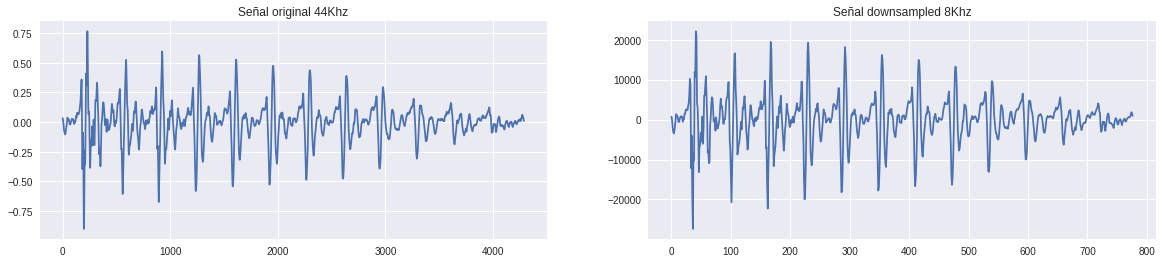

In [17]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.plot(amplitudes)
plt.title("Señal original 44Khz")

plt.subplot(1, 2, 2)
plt.plot(amplitudes_downsampled)
plt.title("Señal downsampled 8Khz");

In [9]:
def create_overlapping_blocks(x, w, R = 0.5):
    n = len(x)
    nw = len(w)
    step = floor(nw * (1 - R))
    nb = floor((n - nw) / step) + 1

    B = np.zeros((nb, nw))

    for i in range(nb):
        offset = i * step
        B[i, :] = w * x[offset : nw + offset]

    return B